## Homework

(1) Create a model whatever you like. It may be $y = 3x_1 + 5x_2 + \mu$ or $y = 4x_1 - 3x_2 + 9x_3 + \mu$. Then:
    - (a) generate random 30 observations depend on the model.
    - (b) fit a linear model depends on the observations generated by step (a), and record the coefficients.
    - (c) repeat (a) and (b) 100 times. Calculate the mean and variance of the coefficients.
Note that each time the generated observations should come from the sample distribution. If you don not understand, just use the `random.rand` function. 


In [23]:
### your solution
from sklearn import linear_model
import numpy as np
coefs = []
ols = linear_model.LinearRegression()
np.random.seed(100)
for i in range(100):
    x = np.random.rand(30, 2)
    y = 3*x[:, 0] + 5*x[:, 1] + np.random.rand(30)
    ols.fit(x, y)
    coefs.append(ols.coef_)

print ("The mean of the estimated coefficients are: " + str(np.mean(coefs, 0)))
print ("The variance of the estimated coefficients are: " + str(np.var(coefs, 0)))

## OR 

coefs = []
ols = linear_model.LinearRegression()
np.random.seed(100)
for i in range(100):
    x = np.random.rand(30, 3)
    y = 4*x[:, 0] - 3*x[:, 1] + 9*x[:, 2] + np.random.rand(30)
    ols.fit(x, y)
    coefs.append(ols.coef_)

print ("The mean of the estimated coefficients are: " + str(np.mean(coefs, 0)))
print ("The variance of the estimated coefficients are: " + str(np.var(coefs, 0)))




The mean of the estimated coefficients are: [ 3.01364387  5.01981367]
The variance of the estimated coefficients are: [ 0.0346508   0.03255635]
The mean of the estimated coefficients are: [ 3.97154712 -3.01938151  8.98023092]
The variance of the estimated coefficients are: [ 0.03592948  0.04512631  0.03626144]


(2) This question involves the use of simple linear regression on the Auto data set(In the file "Auto.csv"). Perform a simple linear regression with *mpg* as the response and *horsepower* as the predictor. 
    - (a) What is the coefficient of mpg? How to explain it?
    - (b) What is the determination of the model? How to explain it?
    - (c) Write down the formula of the model.
    - (d) What is the predicted mpg associated with a horsepower of 98?
    - (e) Plot the response and the predictor.  as well as the least squares regression line.
    


[[-0.15784473]]
0.605948257889
[array([[-0.15784473]]), array([ 39.93586102])]
[[ 24.46707715]]


C:\Users\smadyastha\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


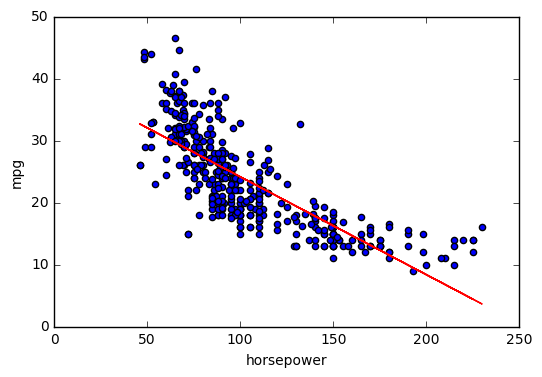

In [16]:
### your solution

import pandas as pd
auto = pd.read_csv('data/Auto.csv')
auto.head()
y = auto[['mpg']]
x = auto[['horsepower']]

from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(x, y)
# (a) coefficient
print (ols.coef_)

# (b) determination
print (ols.score(x, y))

# (c) formula
print ([ols.coef_, ols.intercept_])

# (d) prediction
print (ols.predict([98]))

# (e)plot
%pylab inline
import matplotlib.pyplot as pl
pl.scatter(x ,y)
pl.plot(x, ols.predict(x), color='red')
pl.xlabel('horsepower')
pl.ylabel('mpg')

(3) Do not use the sklearn library, calculate the coefficients manually by employing the numpy library, as well as the determination and prediction. Note that the results should be exactly the same with the results in question (2).

In [19]:
### your solution

import pandas as pd
auto = pd.read_csv('data/Auto.csv')
auto.head()
y = auto[['mpg']]
x = auto[['horsepower']]

import numpy as np
x = np.mat(x)
x = np.column_stack((np.ones([x.shape[0], 1]), x))
y = np.mat(y)
## estimatation
estimate = (x.T*x).I * x.T * y
print ("The coefficients are: \n" + str(estimate) + '\n')

## determination
prediction = x * estimate
deter = (prediction - y.mean()).T * (prediction - y.mean()) / ((y - y.mean()).T * (y - y.mean()))
print ("The determination is: " + str(deter) + '\n')

## prediction
pred = np.mat([1, 98]) * estimate
print ("The prediction of horsepower=98 is: " + str(pred))

The coefficients are: 
[[ 39.93586102]
 [ -0.15784473]]

The determination is: [[ 0.60594826]]

The prediction of horsepower=98 is: [[ 24.46707715]]


(4) (Optional)Fit a linear model on a real data set, and try to explain the model. The step is similar to question (2). The data set may come from arbitrarily subject that you are interested. We are happy to see using machine learning algorithms to deal with various of data!

In [28]:
### your solution

### your solution
import pandas as pd
adv = pd.read_csv('data/adver.csv')
adv.head()
y = adv[['Sales']]
x = auto[['TV']]

from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(x, y)
# (a) coefficient
print ("The coefficient is " + str(ols.coef_))

# (b) determination
print ("The score is " + str(ols.score(x, y)))

# (c) formula
print ("The formula: " + str([ols.coef_, ols.intercept_])



# (e)plot
%pylab inline
import matplotlib.pyplot as pl
pl.scatter(x ,y)
pl.plot(x, ols.predict(x), color='red')
pl.xlabel('TV')
pl.ylabel('Sales')

SyntaxError: invalid syntax (<ipython-input-28-50979e725a7d>, line 25)